# **Philippine Scam SMS**
**Phase 2: Natural Language Processing**

**Author/s: [Anton Reyes](https://www.github.com/AGR-yes)**

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [30]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions
* `spaCy` is an NLP library for "understand" lrge volumes of text
* `WordCloud` is a tool to show the most frequently used word in the dataset
* `NLTK` is an open-source library for NLP and linguistics

In [67]:
import re
import spacy
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


#### **Datasets and Files**

The following `csv` files was used for this project:

- `spam.csv` contains the `proof` and `name` from the `proof.csv` and `select.csv` datasets after Phase 1
- `select.csv` contains all the features needed to fix the `proof.csv` file and add classification or add a `type` column
- `proof.csv` contains features `proof` and `name` only after Phase 1. This does not contain the type of spam and lacks classification.


## **Data Collection**

Importing the dataset using pandas.

In [33]:
dataset = "Processed Datasets\proof.csv"

proof = pd.read_csv(dataset)
proof.tail()

,proof,name
5037,"Araw-araw na suweld0 5000, kai1angan lang ng 1...",False
5038,Goodnews! VIP perks at SUGARPLAY Sign up & Cla...,False
5039,Start referring & earning at SUGARPLAY Earn e...,True
5040,", Experience the thrill at JackpotCity! Enjoy ...",True
5041,", Get 5% Deposit bonus using PAYMAYA at UNIBET...",True


In [34]:
dataset = "Processed Datasets\select.csv"

select = pd.read_csv(dataset)
select.tail()

,id,number,network,type,proof,name,indicator
4878,4886,9207721859,Smart or Talk 'N Text,others,"Just a minimum deposit, you can double your mo...",True,920
4879,4887,9854472269,Smart or Talk 'N Text,others,"Experience SBET, STABLE SYSTEM, NO MAINTENANCE...",True,985
4880,4888,9811248577,Smart or Talk 'N Text,others,JACKPOT CITY has the best gaming experience an...,True,981
4881,4889,9855665323,Smart or Talk 'N Text,others,"Why are you still waiting, DEAR VIP Get your P...",False,985
4882,4891,9264224386,Globe or TM,others,NaN,True,926


In [35]:
dataset = "Processed Datasets\spam.csv"

spam = pd.read_csv(dataset)
spam.tail()

,proof,Date,Time,name
154,"Araw-araw na suweld0 5000, kai1angan lang ng 1...",2023-05-15,02:52,False
155,Goodnews! VIP perks at SUGARPLAY Sign up & Cla...,2023-05-22,04:23,False
156,Start referring & earning at SUGARPLAY Earn e...,2023-05-22,10:38,True
157,", Experience the thrill at JackpotCity! Enjoy ...",2023-05-23,05:56,True
158,", Get 5% Deposit bonus using PAYMAYA at UNIBET...",2023-05-24,10:13,True


## **Description of the Dataset**

Here, we find the shape of the dataset.

In [36]:
proof.shape

(5042, 2)

By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

In [37]:
proof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    5042 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 44.4+ KB


## **Exploratory Data Analysis (Raw Text)**

### **Wordcloud**


In [38]:
#get non-null values
proof_filtered = proof[proof['proof'].notnull()].reset_index(drop=True)
proof_filtered

,proof,name
0,POEA,False
1,POEA,False
2,Federal Partylist,False
3,Build Build Build,False
4,luckyphil.com/login,False
...,...,...
1409,"Araw-araw na suweld0 5000, kai1angan lang ng 1...",False
1410,Goodnews! VIP perks at SUGARPLAY Sign up & Cla...,False
1411,Start referring & earning at SUGARPLAY Earn e...,True
1412,", Experience the thrill at JackpotCity! Enjoy ...",True


In [39]:
proof_filtered['proof'] = [str(value) for value in proof_filtered['proof']]

In [40]:
proof_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1414 non-null   object
 1   name    1414 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 12.6+ KB


In [41]:
text = " ".join(i for i in proof_filtered.proof)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

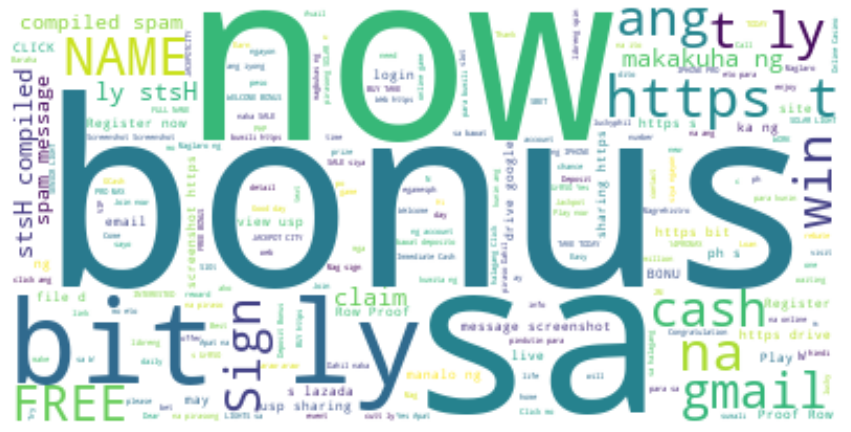

In [42]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Top Words**

In [43]:
#get top 25 words with count into a dataframe
raw_top25 = pd.DataFrame(FreqDist(text.split()).most_common(25), columns=['word','count'])

raw_top25

,word,count
0,ng,336
1,to,323
2,at,314
3,and,262
4,sa,242
5,na,229
6,ang,173
7,up,155
8,for,148
9,you,136


We can see that a lot of the punctuation were considered as a word and that there is a mix of stopwords in both the English and Tagalog language.

## **Natural Language Processing**

### **Text Cleaning**

#### **Stopwords Preparation**

In [44]:
#list of stopwords
en_stopwords = set(STOPWORDS)
en_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [45]:
#import txt as list
with open('Supplemental Datasets\genediazjr-tagalog.txt', 'r') as f:
    tl_stopwords = f.read().splitlines()

tl_stopwords

['ako',
 'sa',
 'akin',
 'ko',
 'aking',
 'sarili',
 'kami',
 'atin',
 'ang',
 'aming',
 'amin',
 'ating',
 'ka',
 'iyong',
 'iyo',
 'inyong',
 'siya',
 'kanya',
 'mismo',
 'ito',
 'nito',
 'kanyang',
 'sila',
 'nila',
 'kanila',
 'kanilang',
 'kung',
 'ano',
 'alin',
 'sino',
 'kanino',
 'na',
 'mga',
 'iyon',
 'am',
 'ay',
 'maging',
 'naging',
 'mayroon',
 'may',
 'nagkaroon',
 'pagkakaroon',
 'gumawa',
 'ginagawa',
 'ginawa',
 'paggawa',
 'ibig',
 'dapat',
 'maaari',
 'marapat',
 'kong',
 'ikaw',
 'tayo',
 'hindi',
 'namin',
 'gusto',
 'nais',
 'niyang',
 'nilang',
 'niya',
 'huwag',
 'ginawang',
 'gagawin',
 'maaaring',
 'sabihin',
 'narito',
 'kapag',
 'ni',
 'nasaan',
 'bakit',
 'paano',
 'kailangan',
 'walang',
 'katiyakan',
 'isang',
 'at',
 'pero',
 'o',
 'dahil',
 'bilang',
 'hanggang',
 'habang',
 'ng',
 'pamamagitan',
 'para',
 'tungkol',
 'laban',
 'pagitan',
 'panahon',
 'bago',
 'pagkatapos',
 'itaas',
 'ibaba',
 'mula',
 'pataas',
 'pababa',
 'palabas',
 'ibabaw',
 'il

In [46]:
#add 'mo' and 'lang' to tl_stopwords
tl_stopwords.extend(['mo', 'lang'])

In [47]:
#merging en_stopwords and tl_stopwords
stopwords = en_stopwords.union(tl_stopwords)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'akin',
 'aking',
 'ako',
 'alin',
 'all',
 'also',
 'am',
 'amin',
 'aming',
 'an',
 'and',
 'ang',
 'ano',
 'anumang',
 'any',
 'apat',
 'are',
 "aren't",
 'as',
 'at',
 'atin',
 'ating',
 'ay',
 'bababa',
 'bago',
 'bakit',
 'bawat',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bilang',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'dahil',
 'dalawa',
 'dapat',
 'did',
 "didn't",
 'din',
 'dito',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'doon',
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'gagawin',
 'gayunman',
 'get',
 'ginagawa',
 'ginawa',
 'ginawang',
 'gumawa',
 'gusto',
 'habang',
 'had',
 "hadn't",
 'hanggang',
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'hindi',
 'his',
 'how',
 "how

#### **Removing Stopwords**

In [48]:
#remove stopwords from dataset
text_only = proof_filtered.copy()

text_only['proof'] = text_only['proof'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

text_only.head()

,proof,name
0,POEA,False
1,POEA,False
2,Federal Partylist,False
3,Build Build Build,False
4,luckyphil.com/login,False


In [49]:
#remove STOPWORDS from dataframe
text_only = text_only[text_only['proof'].notnull()].reset_index(drop=True)
text_only

,proof,name
0,POEA,False
1,POEA,False
2,Federal Partylist,False
3,Build Build Build,False
4,luckyphil.com/login,False
...,...,...
1409,"Araw-araw suweld0 5000, kai1angan 1-2 oras is@...",False
1410,Goodnews! VIP perks SUGARPLAY Sign & Claim PHP...,False
1411,Start referring & earning SUGARPLAY Earn everd...,True
1412,", Experience thrill JackpotCity! Enjoy 5% USDT...",True


#### **Removing Punctuation and Other Strings**

In [50]:
#remove punctuations from dataframe
text_only['proof'] = text_only['proof'].str.replace('[^\w\s]','')
text_only

C:\Users\Mos\AppData\Local\Temp\ipykernel_19508\2214577564.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text_only['proof'] = text_only['proof'].str.replace('[^\w\s]','')


,proof,name
0,POEA,False
1,POEA,False
2,Federal Partylist,False
3,Build Build Build,False
4,luckyphilcomlogin,False
...,...,...
1409,Arawaraw suweld0 5000 kai1angan 12 oras isng a...,False
1410,Goodnews VIP perks SUGARPLAY Sign Claim PHP14...,False
1411,Start referring earning SUGARPLAY Earn everda...,True
1412,Experience thrill JackpotCity Enjoy 5 USDT De...,True


In [51]:
remove = ['httpstlystsH','https://t.ly/stsH','https','&', 'amp', 'amp;', 'tly', 't', 'ly', 'co', 'com', 'www', 'http']

#removing words from dataframe with `remove`
text_only['proof'] = text_only['proof'].apply(lambda x: ' '.join([word for word in x.split() if word not in (remove)]))

#removing single letters with regex
text_only['proof'] = text_only['proof'].str.replace(r'\b[a-zA-Z]\b', '')

C:\Users\Mos\AppData\Local\Temp\ipykernel_19508\2517495946.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  text_only['proof'] = text_only['proof'].str.replace(r'\b[a-zA-Z]\b', '')


### **Classification**

In the `spam.csv` dataset, the needed features such as the `proof` and the `name` are present. However, to add more to the analysis, we can do classification through machine learning with Natural Language Processing techniques.

### **Tokenizing**

In [55]:
display(select.head(), spam.head())

,id,number,network,type,proof,name,indicator
0,1,9103239417,Unknown,work,NaN,False,910
1,2,95348643,Unknown,others,NaN,False,953
2,3,931804865,Unknown,work,NaN,False,931
3,4,981197529,Unknown,lotto,NaN,False,981
4,5,981369614,Unknown,work,NaN,False,981


,proof,Date,Time,name
0,"Welcome ! your have P1222 for S!ot , \nWeb: 11...",2022-11-12,14:02,False
1,"My god, at least 999P rewards waiting for you\...",2022-11-12,14:33,False
2,"DEAR VIP , No. 1 Online Sabong Site here in SB...",2022-11-13,23:03,True
3,"! Today, you can win the iphone14PROMAX while ...",2022-11-14,00:07,True
4,"Welcome ! your have P1222 for S!ot , \nWeb: gr...",2022-11-15,02:28,False


In [61]:
#getting the needed columns from both datasets
select = select[['proof', 'type']]
spam = spam[['proof']]

#adding the label column to spam dataset
spam['label'] = ''

In [64]:
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1255 non-null   object
 1   type    4679 non-null   object
dtypes: object(2)
memory usage: 76.4+ KB


In [75]:
spam['proof'] = spam['proof'].astype(str).str.lower()
select['proof'] = select['proof'].astype(str).str.lower()

In [76]:
regexp = RegexpTokenizer('\w+')

spam['token'] = spam['proof'].apply(regexp.tokenize)

select['token'] = select['proof'].apply(regexp.tokenize)

## **Exploratory Data Analysis (Cleaned Text)**

### **WordCloud**

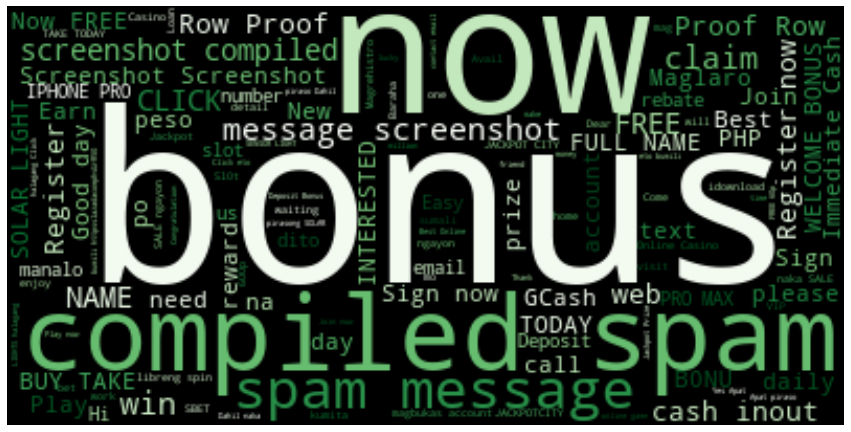

In [52]:
#wordcloud
text = " ".join(i for i in text_only.proof)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap = "Greens").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Top Words**

In [53]:
#top 100 words with count from dataframe
top = pd.DataFrame(FreqDist(text_only['proof'].str.cat(sep=' ').split()).most_common(100), columns=['word','count'])
top

,word,count
0,now,157
1,bonus,122
2,message,68
3,LIGHTS,67
4,3,66
...,...,...
95,600p,21
96,platform,21
97,reply,21
98,Best,21


# **Saving**

In [54]:
#top.to_csv('Processed Datasets/top100_words.csv', index=False)
#text_only.to_csv('Processed Datasets/proof_cleaned.csv', index=False)

#saving wordcloud as png
#wordcloud.to_file('wordcloud.png')